# Dimer and Trimer Analysis #
This notebook goes through simulation and optimization of two simple systems, a dimer with two unique subunits,
and a fully connected trimer with unique subunits. It's purpose is to demonstrate the optimizer, confirm that the simulator
works as expected, and see if we can see any interesting kinetic effects in the simplest systems.

In summary, we do not see trapping, nor any pre equilibrium optimizability (as seen with AP2) in either the trimer or dimer.

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../")
import copy
import numpy as np

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import ReactionNetwork
from steric_free_simulator import EquilibriumSolver

/home/spencerloggia/Projects/biphy/multi_assembly/steric_free_simulator/energy_space_explorer.py:8: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.relax import *


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B.

In [3]:
base_input = '../input_files/dimer.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.

In [4]:
rn.reset()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=1,
                  optim_iterations=10,
                  learning_rate=.1)
optim.rn.update_reaction_net(rn)

Using CPU


In [5]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 7 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 8 was 84.6%
current params: tensor([1.], dtype=torch.float64)
Using CPU
yield on sim iteration 9 was 84.6%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

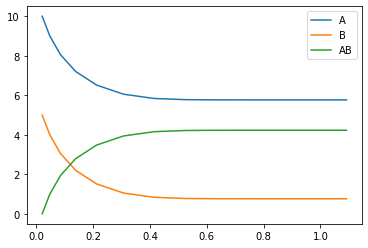

In [6]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

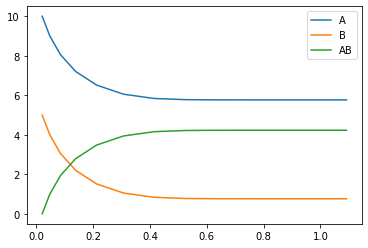

In [7]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

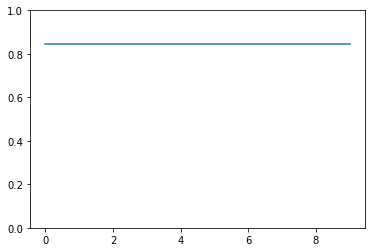

In [8]:
optim.plot_yield()

In [9]:
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve()
print(solution)
print("Equilibrium expected yield: ", solution[-1] / min(optim.rn.initial_copies[:optim.rn.num_monomers]))

Matrix([[5.7670], [0.76704], [4.2330]])
Equilibrium expected yield:  0.846592712402344


<h3> Summary of dimer test</h3>
The dimer model, reaches the same equilbrium regardless of the parameters, and the equilibrium found with the simulator
matches the theoretical equilibrium solution. We do not observe any trapping or other interesting kinetic effects.

<h2> Load basic Trimer info </h2>
Specifies reactions

 - A + B <--> AB
 - B + C <--> BC
 - A + C <--> AC
 - AB + C <--> ABC
 - BC + A <--> ABC
 - AC + B <--> ABC

With starting copy numbers of:

 - A: 5.0 mol
 - B: 5.0 mol
 - C: 5.0 mol

In [10]:
base_input = '../input_files/trimer.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>

Here I set the runtime so that initially the system doesn't reach equilibrium. This allows the optimizer more flexibility
since it can try to optimize yield out of equilibrium.

In [11]:
rn.intialize_activations()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=.6,
                  optim_iterations=1000,
                  learning_rate=.1)
# update rn params to match computed rate constants
optim.rn.update_reaction_net(rn)

Using CPU


In [12]:
optim.optimize()
final_rn = copy.deepcopy(rn)
optim.rn.update_reaction_net(final_rn)

Using CPU
yield on sim iteration 0 was 28.9%
current params: tensor([1.1000, 0.9000, 1.1000, 1.1000, 1.1000, 1.1000], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 29.3%
current params: tensor([1.2000, 0.9743, 1.2000, 1.2000, 1.1978, 1.1978], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 29.3%
current params: tensor([1.3000, 1.0602, 1.3000, 1.3000, 1.2920, 1.2903], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 29.3%
current params: tensor([1.3819, 1.1304, 1.4000, 1.4000, 1.3842, 1.3799], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 29.4%
current params: tensor([1.4511, 1.1898, 1.5000, 1.5000, 1.4723, 1.4646], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 29.4%
current params: tensor([1.5108, 1.2410, 1.6000, 1.6000, 1.5554, 1.5441], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 29.4%
current params: tensor([1.5629, 1.2856, 1.6873, 1.6999, 1.6327, 1.6184], dtype=torch.float64)
Using CPU
yield on sim iter

<h3> Plot the simulation at the first iteration (before optimization) </h3>

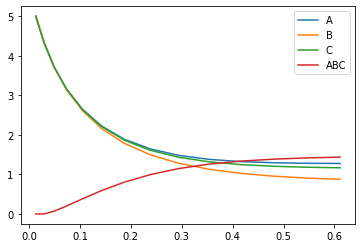

In [13]:
optim.plot_observable(iteration=0)

<h3> Plot the simulation at the last iteration (after all optimization) </h3>

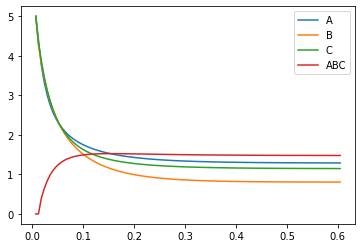

In [14]:
optim.plot_observable(iteration=-1)

<h3> Plot the yield curve over all iterations </h3>

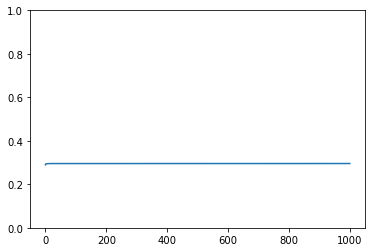

In [15]:
optim.plot_yield()

In [16]:
eq_sol = EquilibriumSolver(rn)
solution = eq_sol.solve()
print(solution)
print("Equilibrium expected yield: ", solution[-1] / min(optim.rn.initial_copies[:optim.rn.num_monomers]))

Matrix([[1.2863], [0.80420], [1.1451], [1.2892], [0.94829], [1.4304], [1.4763]])
Equilibrium expected yield:  0.295250320434570


In [17]:
print('Generated Equilibrium Equations')
for eqn in eq_sol.poly_system:
    print(eqn, '= 0')

Generated Equilibrium Equations
A + AB + ABC + AC - 5.0 = 0
AB + ABC + B + BC - 5.0 = 0
ABC + AC + BC + C - 5.0 = 0
-1.0*A*B + 0.802382122288501*AB = 0
-1.0*A*C + 1.5532362317432*AC = 0
-1.0*B*C + 0.643817070168198*BC = 0
-1.0*AB*C + 1.0*ABC = 0
0.516587307127124*ABC - 1.0*AC*B = 0
-1.0*A*BC + 1.2462889840415*ABC = 0


<h3> Summary of Trimer test</h3>
After 100 iteration, we indeed increase yield at .6 seconds, but we have just found the equilibrium solution, as can be
seen from the results of the equilibrium solver. The optimizer has simply increased the rate at which the full trimer is
formed so that equilibrium is released withing the desired runtime.


The trimer model reaches the same equilibrium regardless of the parameters, and the equilibrium found with the simulator
matches the theoretical equilibrium solution. We do not observe any trapping or other interesting kinetic effects.

